In [ ]:
import numpy as np
import matplotlib.pyplot as plt

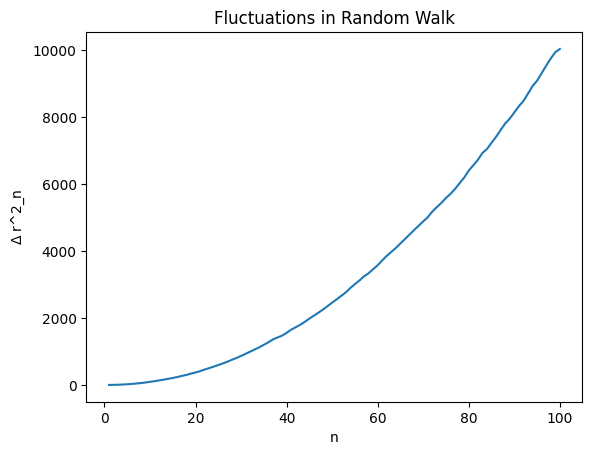

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_step = 100
n_w = 20000
grid = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
r2 = np.zeros(n_step+1)
r2_variance = np.zeros(n_step+1)

# loop over walks
for w in range(n_w):
    x, y = 0, 0

    #steps loop
    for n in range(1, n_step+1):
        # random step from grid
        step = grid[np.random.randint(len(grid))]
        x += step[0]
        y += step[1]

        #displacement squared and add to the average
        r2[n] += x**2 + y**2
        r2_variance[n] += (x**2 + y**2)**2

#avg over number of walks and compute the variance
r2 /= n_w
r2_variance /= n_w
r2_variance -= r2**2

#plot the variance as a function of n
plt.plot(range(1, n_step+1), r2_variance[1:])
plt.xlabel('n')
plt.ylabel('$\Delta$ r^2_n')
plt.title('Fluctuations in Random Walk')
plt.show()

In [ ]:
rs2 = []
for i in range(4, len(r2_variance)-1):
  rs2.append(r2_variance[i+1]/r2_variance[i])
over_n = []
for i in range(4, len(r2_variance)-1):
  over_n.append(1/(i+4))

In [ ]:
a, b = np.polyfit(over_n, rs2,1)
print(a/2)

2.0793439446827207


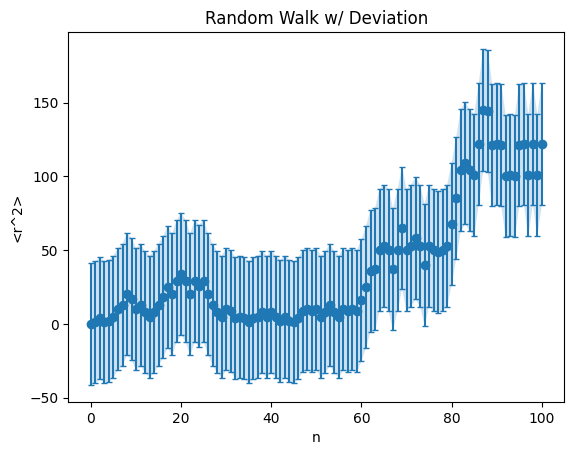

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_step = 100
n_w = 1
grid = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
r2 = np.zeros(n_step+1)

# loop over walks
for w in range(n_w):
    x, y = 0, 0


    #steps loop
    for n in range(1, n_step+1):

        step = grid[np.random.randint(len(grid))]
        x += step[0]
        y += step[1]


        #displacement squared, add to the average
        r2[n] += x**2 + y**2

#avg over number of walks
r2_mean = r2 / n_w
r2_std = np.std(r2, axis=0) #  standard deviation along axis

# error bars
plt.errorbar(np.arange(n_step+1), r2_mean, yerr=r2_std, fmt='o', capsize=2)

#"1 - sigma" band around the mean
plt.fill_between(np.arange(n_step+1), r2_mean-r2_std, r2_mean+r2_std, alpha=0.2)


plt.xlabel('n')
plt.ylabel('<r^2>')
plt.title('Random Walk w/ Deviation')

plt.show()


In [ ]:
n_max = 50
nw = 10000

grid = np.array([[1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1]])

# displacement squared each step
saw_r3 = np.zeros(n_max+1)

# loop over walks
for w in range(nw):

    x, y, z = 0, 0, 0

    used = [(x, y, z)]

    # steps loop
    for n in range(1, n_max+1):

      while True:
        step = grid[np.random.randint(len(grid))]
        x, y, z = x + step[0], y + step[1], z + step[2]

        if (x, y, z) not in used:

            used.append((x, y, z))
            saw_r3[n] += x**2 + y**2 + z**2
            break

    # add to used position
    used.append((x, y, z))

    # displacement squared add to the average
    saw_r3[n_max] += x**2 + y**2 + z**2

# avg over the number of walks
saw_r3 /= nw


In [ ]:
rs3 = []
for i in range(4, len(saw_r3)-1):
  rs3.append(saw_r3[i+1]/saw_r3[i])
over_n = []
for i in range(4, len(saw_r3)-1):
  over_n.append(1/(i+4))

In [ ]:
a, b = np.polyfit(over_n, rs3,1)
print(a/2)

0.5076428475674964


###Flory exponent for 3D lattice^^^^